# Hierarchical Clustering

In [1]:
## for data
import numpy as np
import pandas as pd

## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

## for geospatial
import folium
import geopy

## for machine learning
from scipy.stats import gaussian_kde,zscore,chi2,f_oneway
from sklearn import preprocessing, cluster
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.cluster import AgglomerativeClustering
import scipy
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df = pd.read_excel(r"C:\Users\hp\Downloads\Dimensi IKPS 2022.xlsx")
df.columns.tolist()

['Provinsi',
 'Kesehatan',
 'Gizi',
 'Perumahan',
 'Pangan',
 'Pendidikan',
 'Perlindungan Sosial']

In [3]:
df

,Provinsi,Kesehatan,Gizi,Perumahan,Pangan,Pendidikan,Perlindungan Sosial
0,Aceh,56.9,89.1,83.6,81.7,34.2,72.7
1,Sumatera Utara,62.3,74.9,87.2,85.5,25.6,45.0
2,Sumatera Barat,64.9,92.8,77.2,87.8,31.2,54.6
3,Riau,64.8,88.4,87.1,74.8,25.1,45.0
4,Jambi,73.3,90.3,79.4,79.8,34.7,38.6
5,Sumatera Selatan,73.5,88.9,82.5,87.7,27.9,47.0
6,Bengkulu,82.6,90.0,76.3,80.6,29.7,54.0
7,Lampung,85.8,91.4,82.6,75.6,34.1,55.5
8,Bangka Belitung,84.5,73.4,86.3,74.7,35.7,44.3
9,Kepulauan Riau,73.6,82.3,89.8,81.2,31.8,45.6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Provinsi             34 non-null     object 
 1   Kesehatan            34 non-null     float64
 2   Gizi                 34 non-null     float64
 3   Perumahan            34 non-null     float64
 4   Pangan               34 non-null     float64
 5   Pendidikan           34 non-null     float64
 6   Perlindungan Sosial  34 non-null     float64
dtypes: float64(6), object(1)
memory usage: 2.0+ KB


In [5]:
import pandas as pd

# Assuming 'df' is your DataFrame
df.fillna(0, inplace=True)

# Perform the operations
result_df = pd.DataFrame({
    "type": df.dtypes.values,
    "null": df.isnull().sum().values,
    "null_percentage": ["{:.2f}%".format(val) for val in df.isnull().sum().values / len(df) * 100],
    "unique": [df[i].nunique() for i in df.columns],
    "duplicated": df.duplicated().sum(),
    "sample": [list(pd.Series(df[i].unique()).sample())[0] for i in df.columns]
}).set_index(df.isnull().sum().index).sort_values("null", ascending=False)
result_df

,type,null,null_percentage,unique,duplicated,sample
Provinsi,object,0,0.00%,34,0,Maluku
Kesehatan,float64,0,0.00%,31,0,47.8
Gizi,float64,0,0.00%,33,0,86.1
Perumahan,float64,0,0.00%,32,0,87.2
Pangan,float64,0,0.00%,34,0,87.1
Pendidikan,float64,0,0.00%,32,0,70.0
Perlindungan Sosial,float64,0,0.00%,32,0,38.6


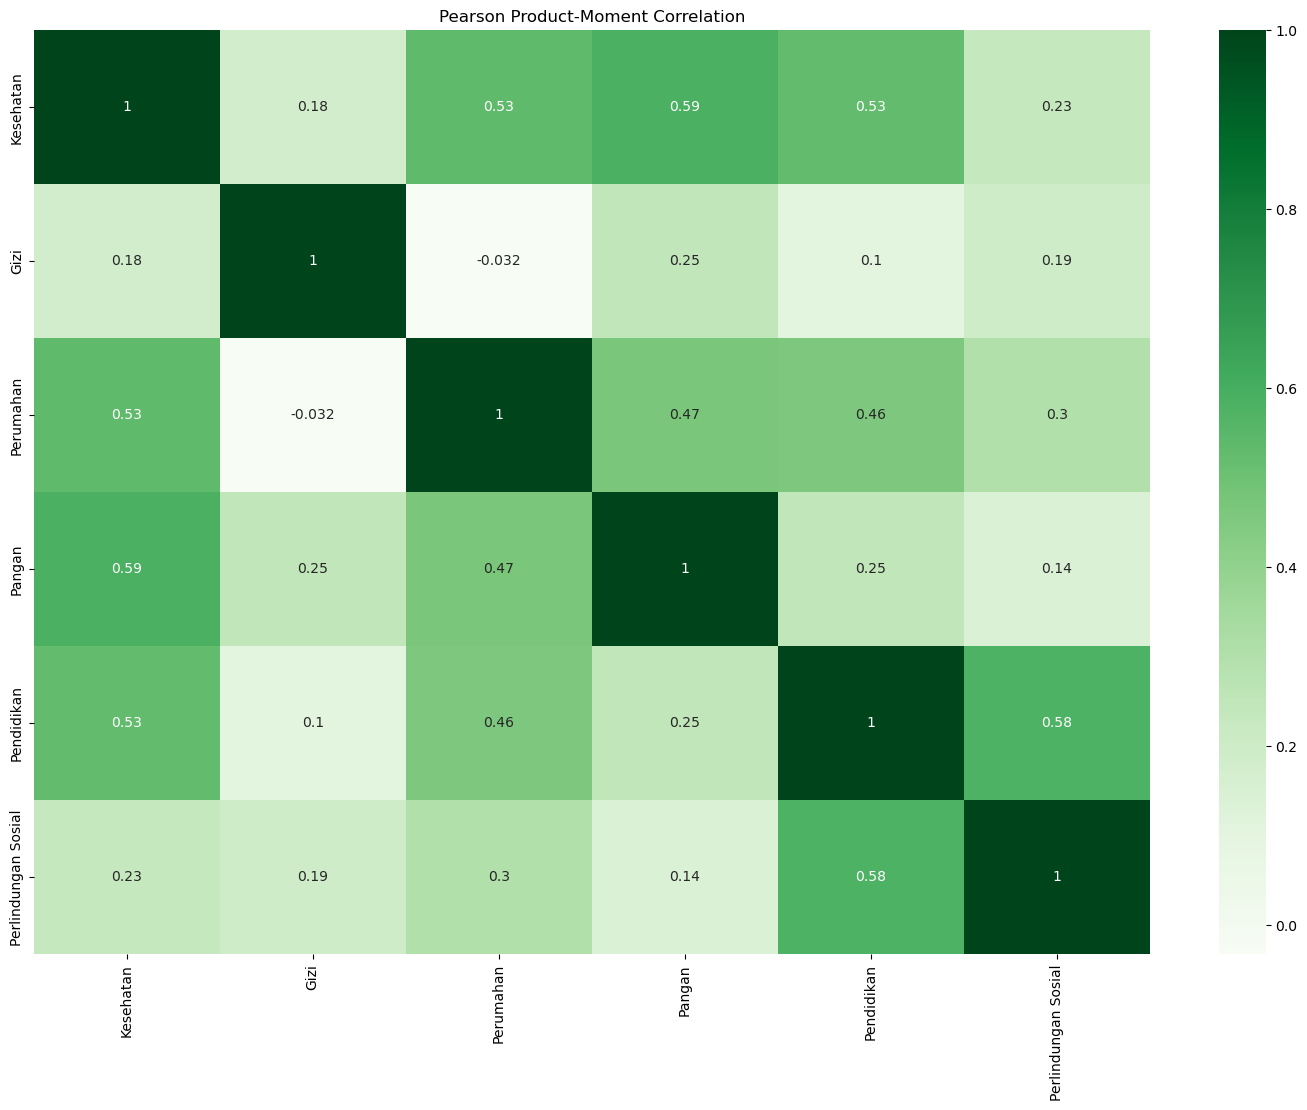

In [6]:
# Heatmap
plt.figure(figsize=(18,12))
sns.heatmap(df.corr(), annot=True, cmap='Greens')
plt.xticks(rotation=90)
plt.title("Pearson Product-Moment Correlation")
plt.show()

In [7]:
df.corr()

,Kesehatan,Gizi,Perumahan,Pangan,Pendidikan,Perlindungan Sosial
Kesehatan,1.000000,0.180458,0.533018,0.587322,0.526582,0.231742
Gizi,0.180458,1.000000,-0.031974,0.253728,0.102882,0.192660
Perumahan,0.533018,-0.031974,1.000000,0.465652,0.457013,0.302350
Pangan,0.587322,0.253728,0.465652,1.000000,0.249735,0.139192
Pendidikan,0.526582,0.102882,0.457013,0.249735,1.000000,0.578434
Perlindungan Sosial,0.231742,0.192660,0.302350,0.139192,0.578434,1.000000


In [8]:
# Mengatur kolom 'Provinsi' sebagai index
df.set_index('Provinsi', inplace=True)

# VIF

In [9]:
# Menambahkan kolom konstanta untuk model OLS
X = sm.add_constant(df)

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data

,feature,VIF
0,const,272.745946
1,Kesehatan,2.150117
2,Gizi,1.172173
3,Perumahan,1.697484
4,Pangan,1.742419
5,Pendidikan,2.085024
6,Perlindungan Sosial,1.601473


# KMO dan Barlett

In [10]:
from factor_analyzer import FactorAnalyzer,calculate_kmo,calculate_bartlett_sphericity
print(f"KMO\t\t: {calculate_kmo(df)[-1]}")
print(f"Bartlett\t: {calculate_bartlett_sphericity(df)[-1]}")

KMO		: 0.6667557610147583
Bartlett	: 2.168047553164811e-06


Dari output di atas diketahui bahwa nilai VIF pada setiap variabel kurang dari 10, sehingga uji asumsi multikolinearitas terpenuhi. Multikolinearitas adalah hubungan linear yang ada di antara variabel independen. Jika nilai VIF melebihi angka 10 maka dapat disimpulkan ada multikolinearitas.

Untuk mengetahui apakah sampel yang digunakan mewakili populasi, dapat dilihat dari nilai Kaisen Meyer Olkin (KMO). Dari hasil output di atas dapat dilihat bahwa nilai KMO lebih dari 0,05 sehingga asumsi kecukupan data terpenuhi yaitu data cukup untuk dilakukan analisis cluster. Dari hasil output di atas diketahui bahwa p-value kurang dari 0,05 sehingga asumsi uji barlett terpenuhi.

In [11]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Kesehatan,34.0,73.064706,9.959155,47.8,69.325,74.35,80.650,85.8
Gizi,34.0,85.205882,7.793352,67.6,80.100,86.85,90.300,98.5
Perumahan,34.0,84.320588,7.965828,52.9,79.600,85.20,88.875,97.2
Pangan,34.0,77.200000,13.867665,39.7,73.425,79.95,86.700,96.3
Pendidikan,34.0,36.997059,11.002548,14.1,30.825,34.45,41.400,70.0
Perlindungan Sosial,34.0,54.020588,10.326394,35.1,46.400,53.80,58.325,77.9


# Preprocessing

In [12]:
# Transformasi data menggunakan zscore
df_t = df.copy().apply(zscore,ddof=1)
df_t.head()

,Kesehatan,Gizi,Perumahan,Pangan,Pendidikan,Perlindungan Sosial
Provinsi,,,,,,
Aceh,-1.623100,0.499672,-0.090460,0.324496,-0.254219,1.808900
Sumatera Utara,-1.080885,-1.322394,0.361471,0.598515,-1.035856,-0.873547
Sumatera Barat,-0.819819,0.974435,-0.893892,0.764368,-0.526883,0.056110
Riau,-0.829860,0.409852,0.348917,-0.173064,-1.081300,-0.873547
Jambi,0.023626,0.653649,-0.617712,0.187487,-0.208775,-1.493318


# Hierarchical Clustering

# Single Linkage

Metode Single Linkage adalah proses clustering yang didasarkan pada jarak terdekat antar objeknya. Jika dua objek terpisah oleh jarak pendek, maka kedua objek tersebut akan bergabung menjadi satu cluster dan demikian seterusnya. 

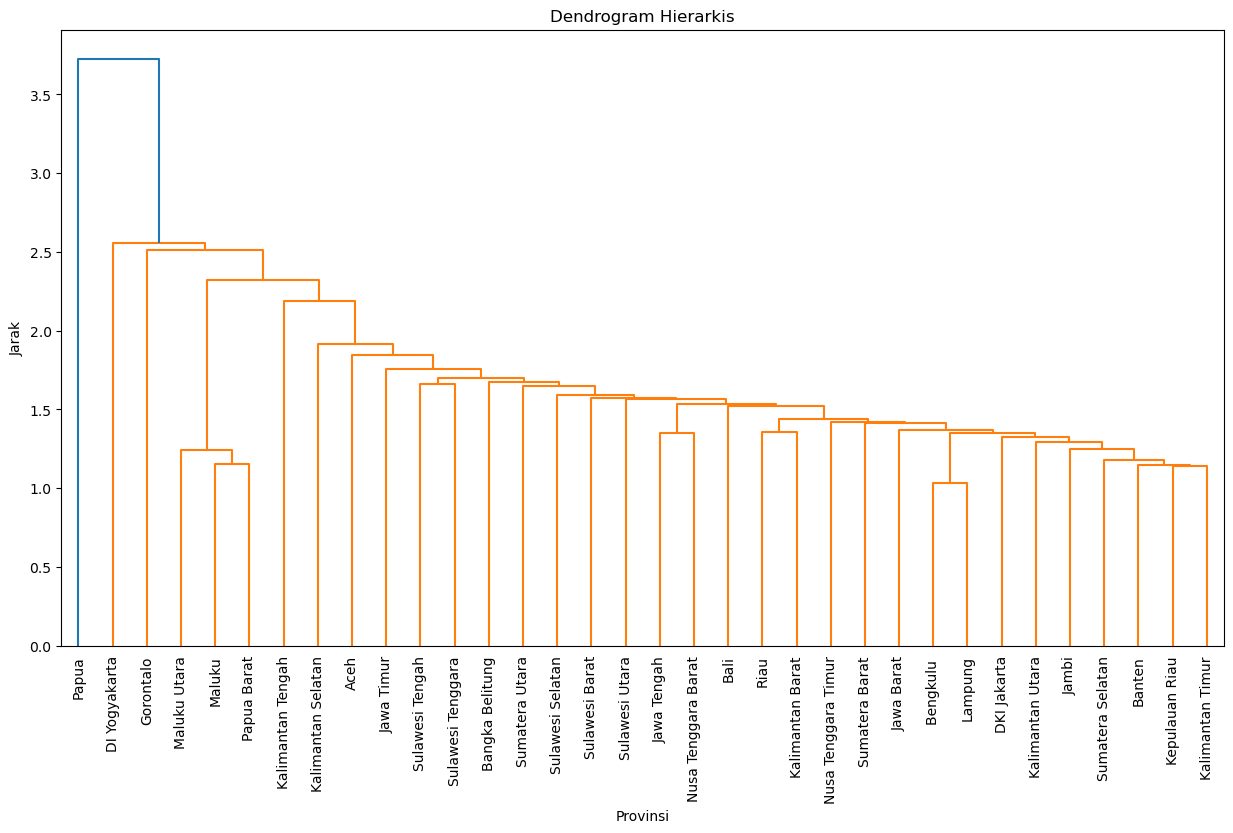

In [13]:
# Mengambil nama-nama provinsi dari indeks
provinsi = df_t.index.tolist()

# Single linkage
mergings = linkage(df_t, method="single", metric='euclidean')

# Plot dendrogram
plt.figure(figsize=(15, 8))
dendrogram(mergings, labels=provinsi, leaf_rotation=90, leaf_font_size=10)
plt.xlabel('Provinsi')
plt.ylabel('Jarak')
plt.title('Dendrogram Hierarkis')
plt.axhline(y=50, color='r', linestyle='--')  # Contoh pemotongan pada jarak 50
plt.show()

# Complete Linkage
Pengukuran jarak pada metode complete linkage dilakukan berdasarkan jarak maksimum atau terjauh.

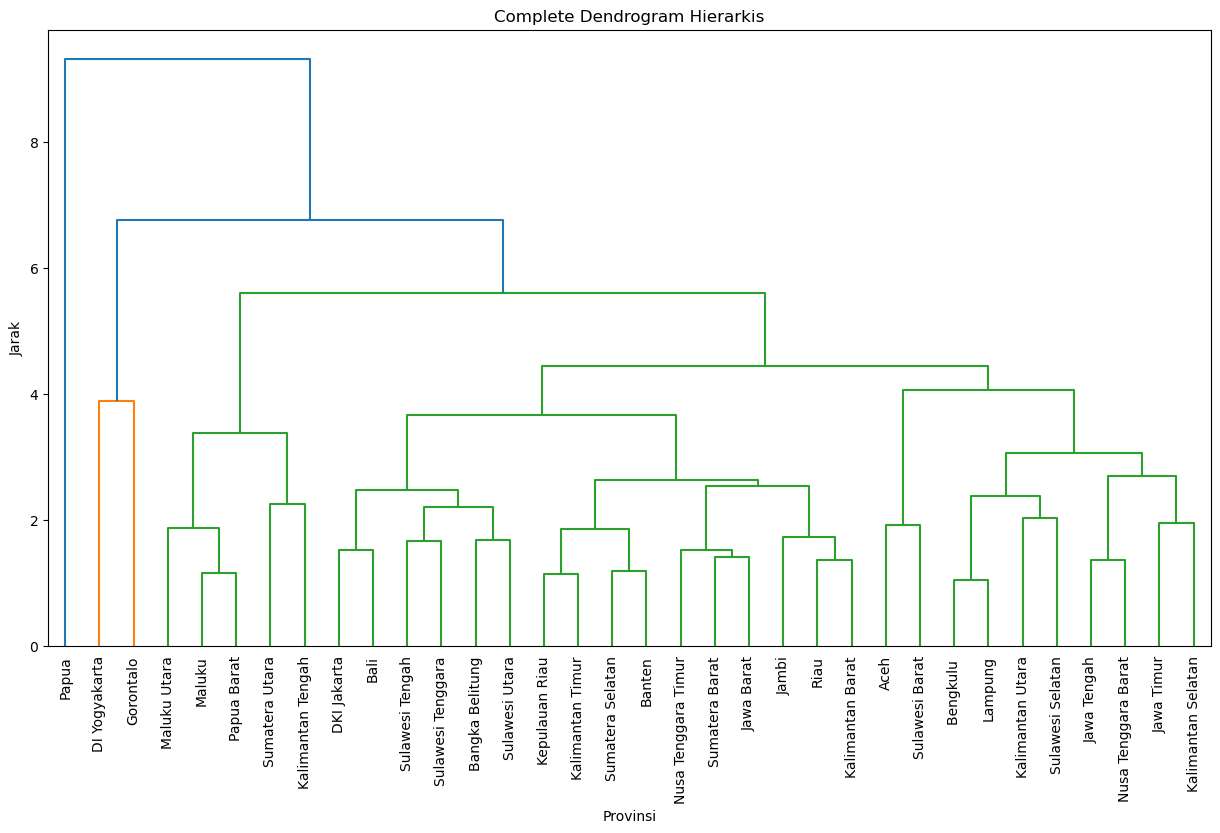

In [14]:
# Mengambil nama-nama provinsi dari indeks
provinsi = df_t.index.tolist()

# Single linkage
mergings = linkage(df_t, method="complete", metric='euclidean')

# Plot dendrogram
plt.figure(figsize=(15, 8))
dendrogram(mergings, labels=provinsi, leaf_rotation=90, leaf_font_size=10)
plt.xlabel('Provinsi')
plt.ylabel('Jarak')
plt.title('Complete Dendrogram Hierarkis')
plt.axhline(y=50, color='r', linestyle='--')  # Contoh pemotongan pada jarak 50
plt.show()

# Average Linkage

Kriteria yang digunakan dalam mengukur jarak pada metode ini adalah rata-rata jarak seluruh individu dalam satu kelompok dengan jarak seluruh individu dalam kelompok lain.

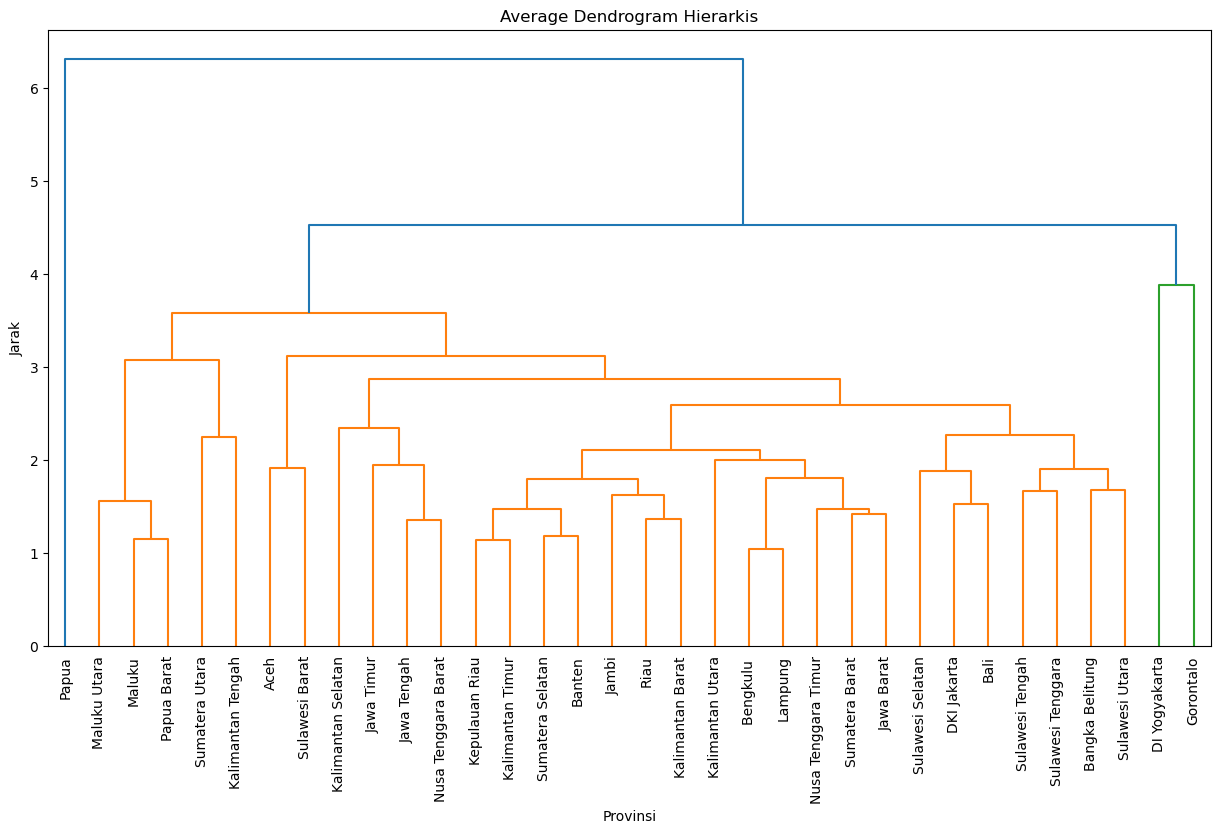

In [15]:
# Mengambil nama-nama provinsi dari indeks
provinsi = df_t.index.tolist()

# average linkage
mergings = linkage(df_t, method="average", metric='euclidean')

# Plot dendrogram
plt.figure(figsize=(15, 8))
dendrogram(mergings, labels=provinsi, leaf_rotation=90, leaf_font_size=10)
plt.xlabel('Provinsi')
plt.ylabel('Jarak')
plt.title('Average Dendrogram Hierarkis')
plt.axhline(y=50, color='r', linestyle='--')  # Contoh pemotongan pada jarak 50
plt.show()

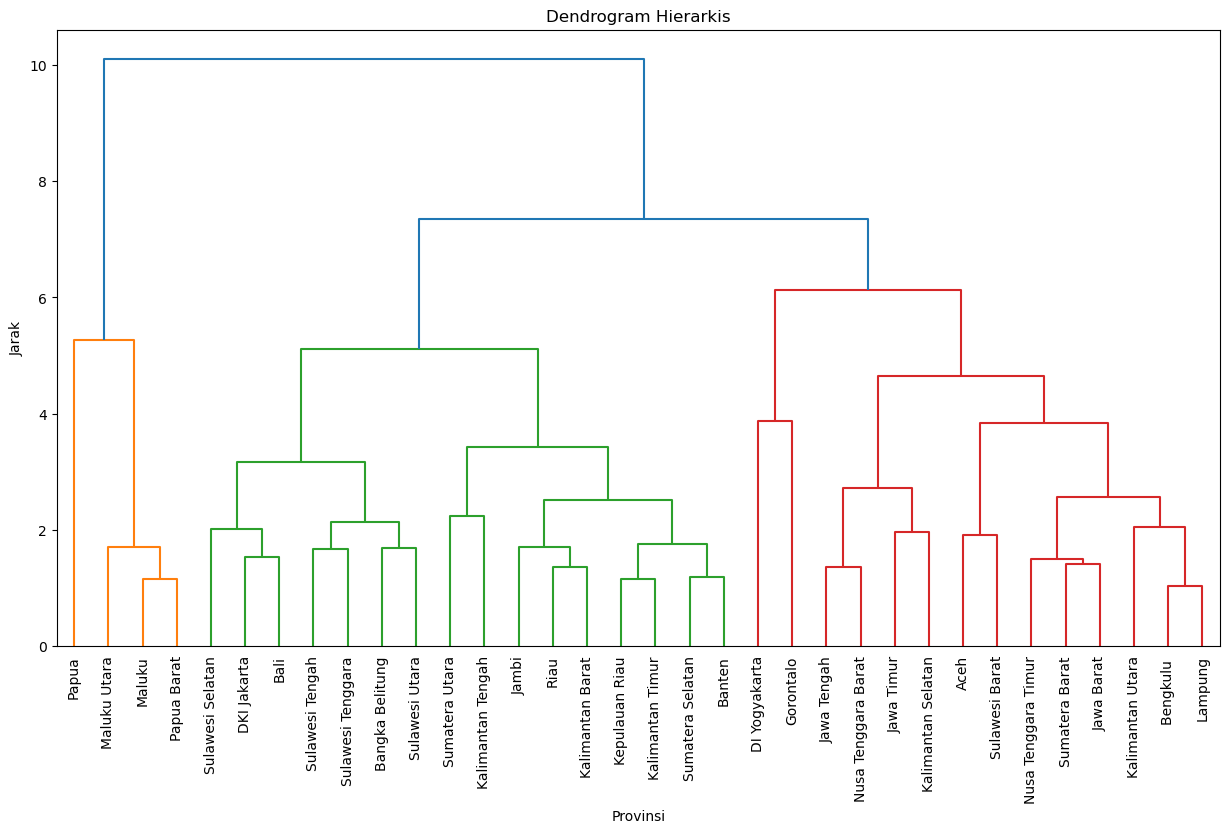

In [16]:
# Mengambil nama-nama provinsi dari indeks
provinsi = df_t.index.tolist()

# Single linkage
mergings = linkage(df_t, method="ward", metric='euclidean')

# Plot dendrogram
plt.figure(figsize=(15, 8))
dendrogram(mergings, labels=provinsi, leaf_rotation=90, leaf_font_size=10)
plt.xlabel('Provinsi')
plt.ylabel('Jarak')
plt.title('Dendrogram Hierarkis')
plt.axhline(y=50, color='r', linestyle='--')  # Contoh pemotongan pada jarak 50
plt.show()

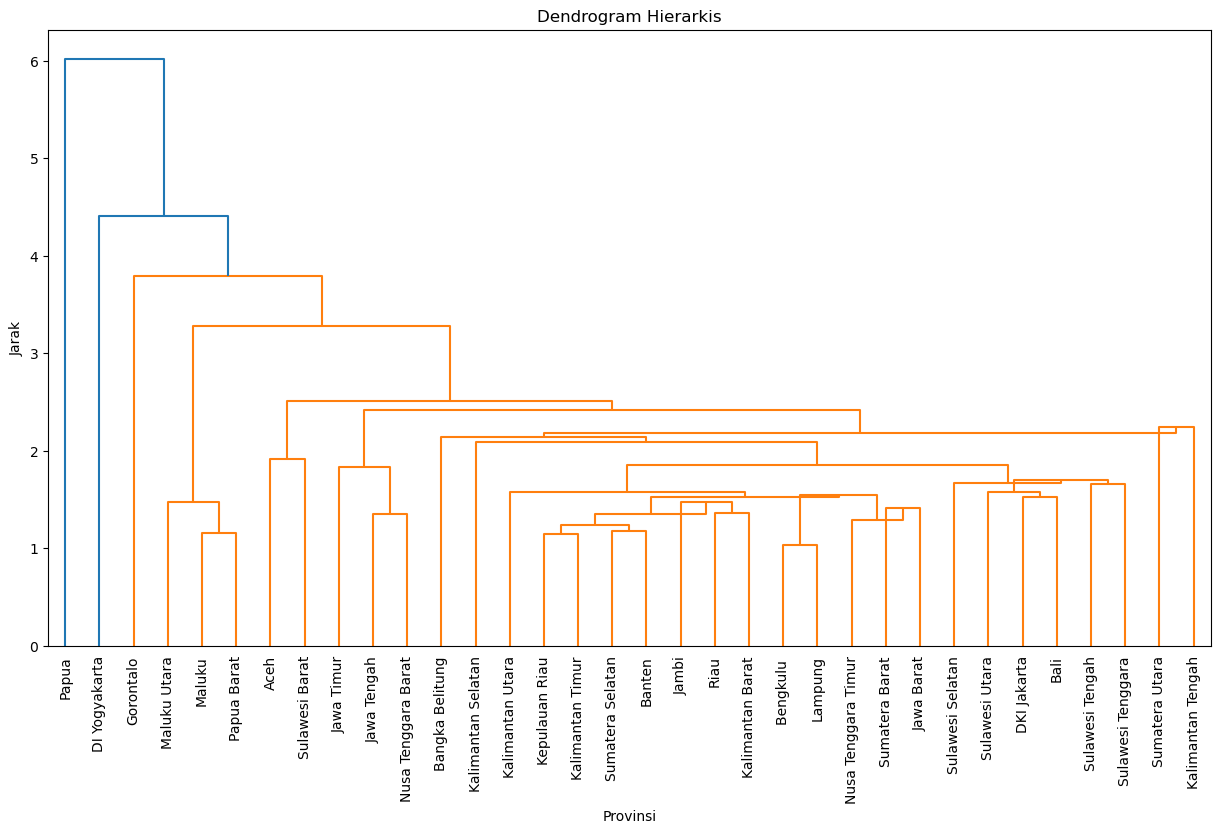

In [17]:
# Mengambil nama-nama provinsi dari indeks
provinsi = df_t.index.tolist()

# Single linkage
mergings = linkage(df_t, method="centroid", metric='euclidean')

# Plot dendrogram
plt.figure(figsize=(15, 8))
dendrogram(mergings, labels=provinsi, leaf_rotation=90, leaf_font_size=10)
plt.xlabel('Provinsi')
plt.ylabel('Jarak')
plt.title('Dendrogram Hierarkis')
plt.axhline(y=50, color='r', linestyle='--')  # Contoh pemotongan pada jarak 50
plt.show()

In [18]:
# Menghitung nilai korelasi Cophenetic untuk setiap metode
methods = ["Single Linkage", "Complete Linkage", "Average Linkage", "Ward Linkage", "Centroid Linkage"]
mergings = [linkage(df_t, method="single", metric='euclidean'),
            linkage(df_t, method="complete", metric='euclidean'),
            linkage(df_t, method="average", metric='euclidean'),
            linkage(df_t, method="ward", metric='euclidean'),
            linkage(df_t, method="centroid", metric='euclidean')]
cophenetic_values = [cophenet(merging, pdist(df_t))[0] for merging in mergings]

# Membuat dataframe untuk tabel
data = {"Metode": methods, "Nilai Korelasi Cophenetic": cophenetic_values}
df_cophenetic = pd.DataFrame(data)
df_cophenetic

,Metode,Nilai Korelasi Cophenetic
0,Single Linkage,0.827912
1,Complete Linkage,0.814592
2,Average Linkage,0.852734
3,Ward Linkage,0.614810
4,Centroid Linkage,0.855467


In [19]:
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

In [20]:
# Maksimum jumlah klaster yang ingin dipertimbangkan
max_clusters = 10

# Menghitung CH Index untuk setiap jumlah klaster
ch_scores = []
for n_clusters in range(2, max_clusters+1):
    clusterer = AgglomerativeClustering(n_clusters=n_clusters, linkage='average')
    cluster_labels = clusterer.fit_predict(df_t)
    ch_score = metrics.calinski_harabasz_score(df_t, cluster_labels)
    ch_scores.append(ch_score)

# Membuat dataframe untuk tabel
data = {"Jumlah Klaster": range(2, max_clusters+1), "CH Index": ch_scores}
df_ch = pd.DataFrame(data)
df_ch

,Jumlah Klaster,CH Index
0,2,6.900287
1,3,6.790721
2,4,5.211420
3,5,7.242186
4,6,7.033367
5,7,6.814244
6,8,7.700328
7,9,9.458434
8,10,8.864644


Dipilih jumlah 2 cluster. Hal ini dikarenakan 2 cluster memberikan perbedaan yang jelas dan signifikan antara kelompok-kelompok data 

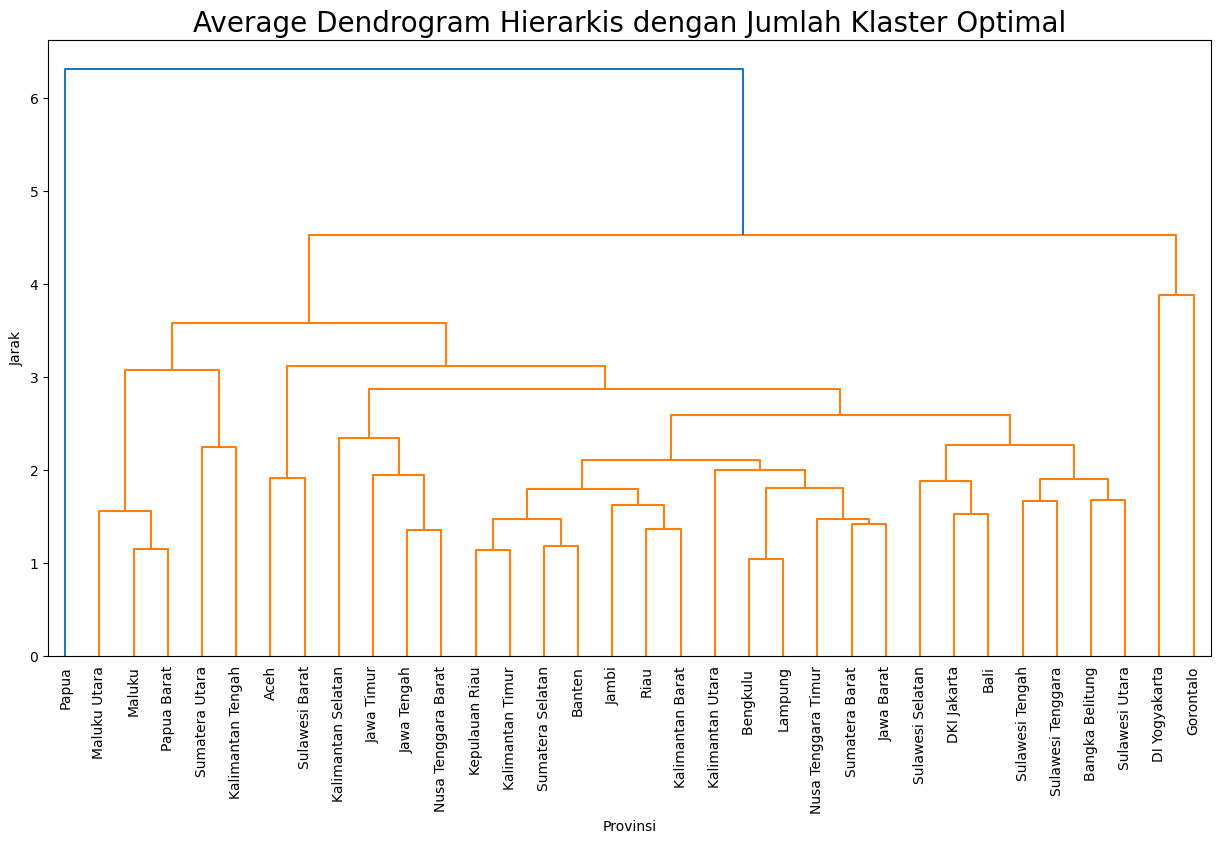

In [21]:
# Mengambil nama-nama provinsi dari indeks
provinsi = df_t.index.tolist()

# average linkage
mergings = linkage(df_t, method="average", metric='euclidean')

# Menentukan jumlah klaster optimal berdasarkan CH Index
optimal_n_clusters = 2

# Menampilkan dendrogram dengan warna klaster optimal
plt.figure(figsize=(15, 8))
dendrogram(mergings, labels=provinsi, leaf_rotation=90, leaf_font_size=10, color_threshold=mergings[-optimal_n_clusters + 1, 2])
plt.xlabel('Provinsi')
plt.ylabel('Jarak')
plt.title('Average Dendrogram Hierarkis dengan Jumlah Klaster Optimal', fontsize=20)
plt.show()

In [22]:
# Melakukan klasterisasi hierarkis
cluster_labels = fcluster(mergings, optimal_n_clusters, criterion='maxclust')

# Menambahkan label klaster ke dalam DataFrame
df_t['Cluster'] = cluster_labels

# Menganalisis karakteristik setiap klaster
cluster_characteristics = df_t.groupby('Cluster').mean()

# Menampilkan karakteristik setiap klaster dalam bentuk tabel
cluster_characteristics

,Kesehatan,Gizi,Perumahan,Pangan,Pendidikan,Perlindungan Sosial
Cluster,,,,,,
1,0.076874,0.001578,0.119528,0.081943,0.063063,0.020309
2,-2.536832,-0.052081,-3.944422,-2.704132,-2.081069,-0.670184


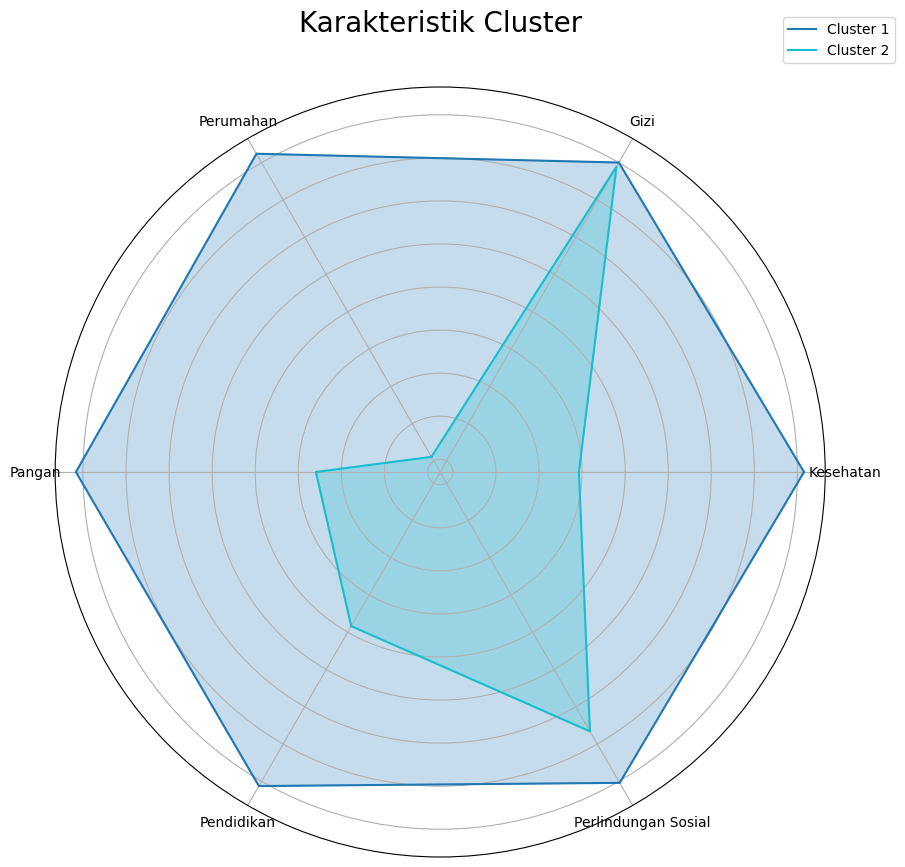

In [23]:
# Jumlah klaster
num_clusters = 2

# Data karakteristik klaster
cluster_data = cluster_characteristics.values

# Label untuk tiap karakteristik
labels = cluster_characteristics.columns

# Jumlah karakteristik
num_vars = len(labels)

# Mengatur sudut dan posisi label
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Menambahkan titik awal untuk menggambar bentuk tertutup
cluster_data = np.concatenate((cluster_data, cluster_data[:, [0]]), axis=1)
angles += angles[:1]

# Membuat radar chart
fig, ax = plt.subplots(subplot_kw=dict(polar=True), figsize=(10, 10))

# Menggambar garis untuk setiap klaster dengan warna yang berbeda
colors = plt.cm.get_cmap('tab10', num_clusters)
for i in range(num_clusters):
    ax.fill(angles, cluster_data[i], color=colors(i), alpha=0.25)
    ax.plot(angles, cluster_data[i], color=colors(i), linewidth=1.5, linestyle='solid', label=f'Cluster {i+1}')

# Menambahkan legenda
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

# Mengatur label pada radar chart
ax.set_yticklabels([])
ax.set_thetagrids(np.degrees(angles[:-1]), labels)

plt.title('Karakteristik Cluster', fontsize=20, pad=40)
plt.show()

Secara keseluruhan, cluster 1 menunjukkan kondisi yang lebih baik dibandingkan cluster 2 untuk semua indikator yang diukur.

In [24]:
# Menentukan jumlah klaster optimal
optimal_n_clusters = 2

# Melakukan klasterisasi hierarkis
cluster_labels = fcluster(mergings, optimal_n_clusters, criterion='maxclust')

# Menambahkan label klaster ke dalam DataFrame
df_t['Cluster'] = cluster_labels

# Membuat tabel yang berisi nama-nama provinsi yang masuk dalam tiap cluster
clustered_provinces = {}
for cluster_num in range(1, optimal_n_clusters+1):
    provinces_in_cluster = df_t[df_t['Cluster'] == cluster_num].index.tolist()
    clustered_provinces[f'Cluster {cluster_num}'] = provinces_in_cluster

clustered_provinces_df = pd.DataFrame.from_dict(clustered_provinces, orient='index')
clustered_provinces_df.index.name = 'Cluster'
clustered_provinces_df.columns.name = 'Provinsi'

# Mentranspose DataFrame
clustered_provinces_df = clustered_provinces_df.transpose()

clustered_provinces_df.replace([None]," ",inplace=True)
# Menampilkan tabel
clustered_provinces_df

Cluster,Cluster 1,Cluster 2
Provinsi,,
0,Aceh,Papua
1,Sumatera Utara,
2,Sumatera Barat,
3,Riau,
4,Jambi,
5,Sumatera Selatan,
6,Bengkulu,
7,Lampung,
8,Bangka Belitung,


In [25]:
# Menentukan jumlah klaster yang diinginkan
n_clusters = 2

# Melakukan clustering dengan metode average linkage
cluster = AgglomerativeClustering(n_clusters=n_clusters, linkage='average')
cluster_labels = cluster.fit_predict(df_t)

# Menghitung metrik-metrik evaluasi
silhouette_avg_kmeans2 = round(silhouette_score(df_t, cluster_labels), 5)
davies_bouldin_kmeans2 = round(davies_bouldin_score(df_t, cluster_labels), 5)
calinski_harabasz_kmeans2 = round(calinski_harabasz_score(df_t, cluster_labels), 5)

test_kmeans2 = pd.DataFrame({'Hierarki': [silhouette_avg_kmeans2,
                                       davies_bouldin_kmeans2,
                                       calinski_harabasz_kmeans2]},
index=['Silhouette Score', 'Davies-Bouldin', 'Calinski-Harabasz'])
test_kmeans2

,Hierarki
Silhouette Score,0.49611
Davies-Bouldin,0.34519
Calinski-Harabasz,7.09097


Silhouette Score 0.51332 menunjukkan bahwa klaster-klaster yang dihasilkan cukup baik, karena Silhouette Score berada dalam rentang -1 hingga 1, di mana nilai lebih dekat ke 1 menunjukkan klaster yang lebih jelas dan terpisah dengan baik.

# Kesimpulan
Metode clustering terbaik yang diperoleh adalah average linkage dengan jumlah klaster sebanyak 2. Klaster 1 terdiri dari 33 provinsi, sedangkan Klaster 2 terdiri dari 1 provinsi yaitu Papua. Klaster yang dihasilkan menunjukkan performa yang cukup baik dengan nilai Silhouette Coefficient sebesar 0.51332.